This is our Jupyter Notebook for analyzing, cleaning and visually displaying weather data across North Carolina counties over the course of several years

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from matplotlib.pyplot import figure
from sklearn import datasets

# Study data files
beaufortpath = "Beaufort.csv"
manteopath = "Manteo.csv"
ocracokepath = "Ocracoke.csv"

# Read the data
beaufortdata = pd.read_csv(beaufortpath)
manteodata = pd.read_csv(manteopath)
ocracokedata = pd.read_csv(ocracokepath)

In [2]:
beaufortdata

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT02,WT02_ATTRIBUTES,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,USW00093765,2000-04-26,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",0.0,",,W,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093765,2000-04-27,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",0.0,"T,,W,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093765,2000-04-28,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",419.0,",,W,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093765,2000-04-29,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",20.0,",,W,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093765,2000-04-30,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",0.0,",,W,",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,USW00093765,2024-01-23,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",0.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8660,USW00093765,2024-01-24,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",0.0,"T,,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8661,USW00093765,2024-01-25,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",3.0,",,W,2400",0.0,",,W",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8662,USW00093765,2024-01-26,34.73258,-76.65659,1.5,"BEAUFORT MICHAEL J. SMITH FIELD, NC US",10.0,",,W,2400",0.0,",,W",...,1.0,",,W",NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,W"


In [3]:
manteodata

,Date,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP,SNOW (Inches),SNWD (Inches)
0,10/8/2011,NaN,NaN,NaN,0.00,0.0,NaN
1,10/9/2011,NaN,NaN,NaN,NaN,NaN,NaN
2,10/10/2011,NaN,NaN,NaN,NaN,NaN,NaN
3,10/11/2011,NaN,NaN,NaN,NaN,NaN,NaN
4,10/12/2011,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2754,4/23/2019,NaN,NaN,NaN,0.00,0.0,NaN
2755,4/24/2019,NaN,NaN,NaN,0.00,0.0,NaN
2756,4/25/2019,NaN,NaN,NaN,0.00,0.0,NaN
2757,4/26/2019,NaN,NaN,NaN,0.00,0.0,NaN


In [4]:
import os
import csv
import pandas as pd
import pathlib as path
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Ocracoke.csv")

rainfall_df = data[["DATE", "PRCP"]]
rainfall_df

,DATE,PRCP
0,1957-05-16,0.0
1,1957-05-17,0.0
2,1957-05-18,0.0
3,1957-05-19,58.0
4,1957-05-20,69.0
...,...,...
14420,2024-01-24,0.0
14421,2024-01-25,0.0
14422,2024-01-26,5.0
14423,2024-01-27,0.0


In [5]:
hurricanes = pd.read_csv("HurricanesDareCounty1985to2020.csv")

hurricane_df = hurricanes[["Hurricane", "Date", "Max Wind Speed"]]
hurricane_df

,Hurricane,Date,Max Wind Speed
0,Gloria,9/26/1985,144
1,Kate,11/22/1985,123
2,Bob,8/19/1991,115
3,Emily,8/31/1993,115
4,Bertha,7/13/1996,115
5,Fran,9/10/1996,121
6,Bonnie,8/31/1998,115
7,Earl,9/8/1998,98
8,Dennis,9/14/1999,104
9,Floyd,9/16/1999,155


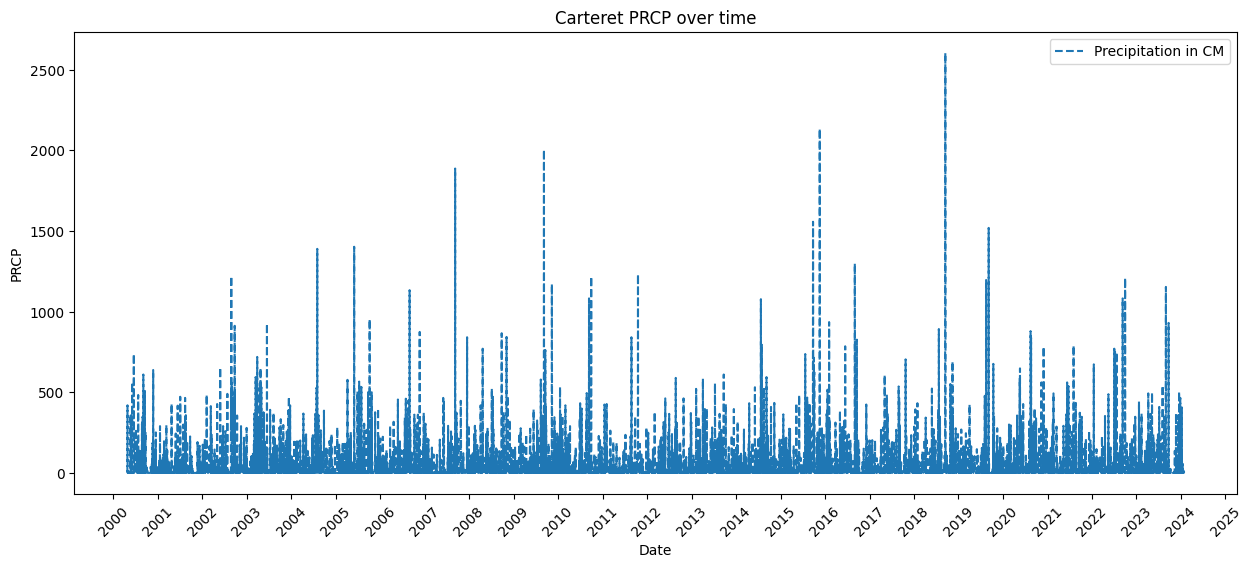

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Study data files
beaufortpath = "Beaufort.csv"

bf = pd.read_csv(beaufortpath)

# Specify the columns for the x and y axes
x_column = 'DATE'
y_column = 'PRCP'

bf[x_column] = pd.to_datetime(bf[x_column])

# Set the size of the figure
plt.figure(figsize=(15, 6))  # Adjust the width (12) and height (6) as needed

# Plot the line graph with a dashed line style
plt.plot(bf[x_column], bf[y_column], linestyle='--', label='Precipitation in CM')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('PRCP')
plt.title('Carteret PRCP over time'.format(y_column, x_column))

# Set x-axis ticks to display every year
plt.gca().xaxis.set_major_locator(YearLocator())

plt.xticks(rotation=45)


plt.legend()

# Display the plot
plt.show()

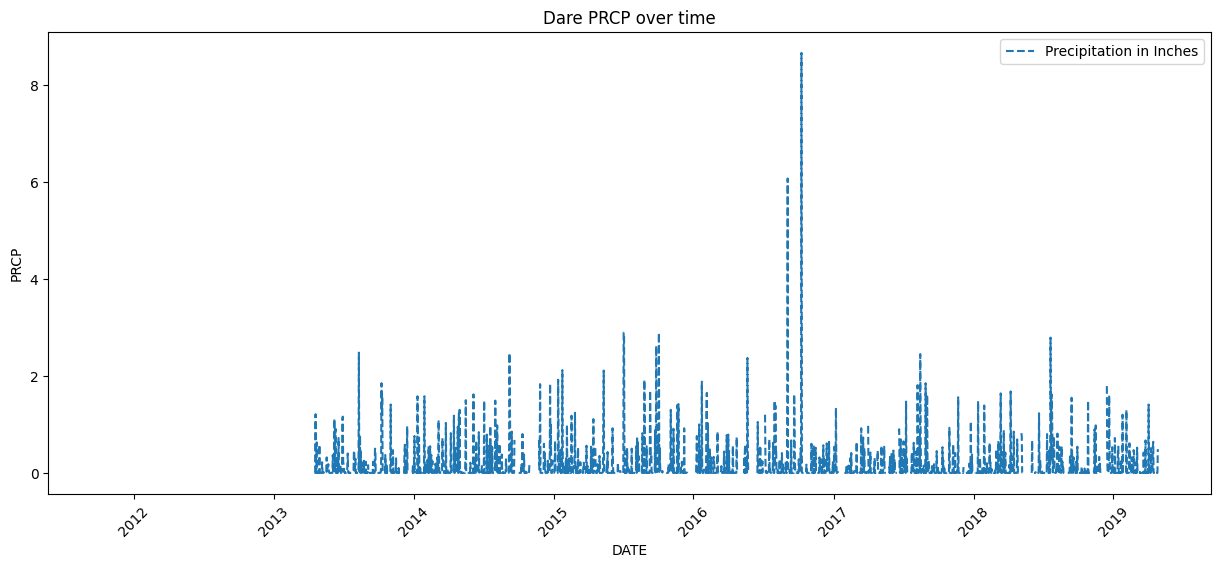

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Study data files
manteopath = "Manteo.csv"
mt = pd.read_csv(manteopath)

# Specify the columns for the x and y axes
x_column = 'Date'
y_column = 'PRCP'

mt[x_column] = pd.to_datetime(mt[x_column])

# Set the size of the figure
plt.figure(figsize=(15, 6))

# Plot the line graph with a dashed line style
plt.plot(mt[x_column], mt[y_column], linestyle='--', label='Precipitation in Inches')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('PRCP')
plt.title('Dare PRCP over time'.format(y_column, x_column))

# Set x-axis ticks to display every year
plt.gca().xaxis.set_major_locator(YearLocator())

plt.xticks(rotation=45)

plt.legend()

# Display the plot
plt.show()

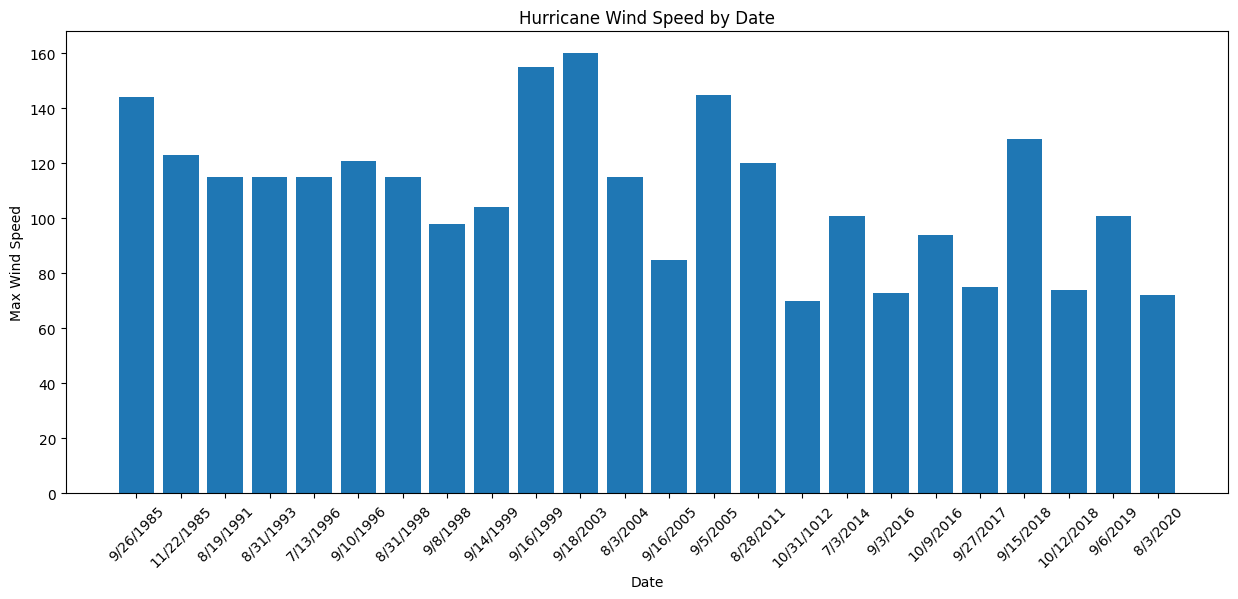

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

hurricanepath = "HurricanesDareCounty1985to2020.csv"
hurricane_csv = pd.read_csv(hurricanepath)

# Specify the columns for the x and y axes
x_column = "Date"
y_column = "Max Wind Speed"

# Set the size of the figure (adjust the width and height as needed)
plt.figure(figsize=(15, 6))

# Plot the bar graph
plt.bar(hurricane_csv[x_column], hurricane_csv[y_column])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Max Wind Speed')
plt.title('Hurricane Wind Speed by Date')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

plt.show()

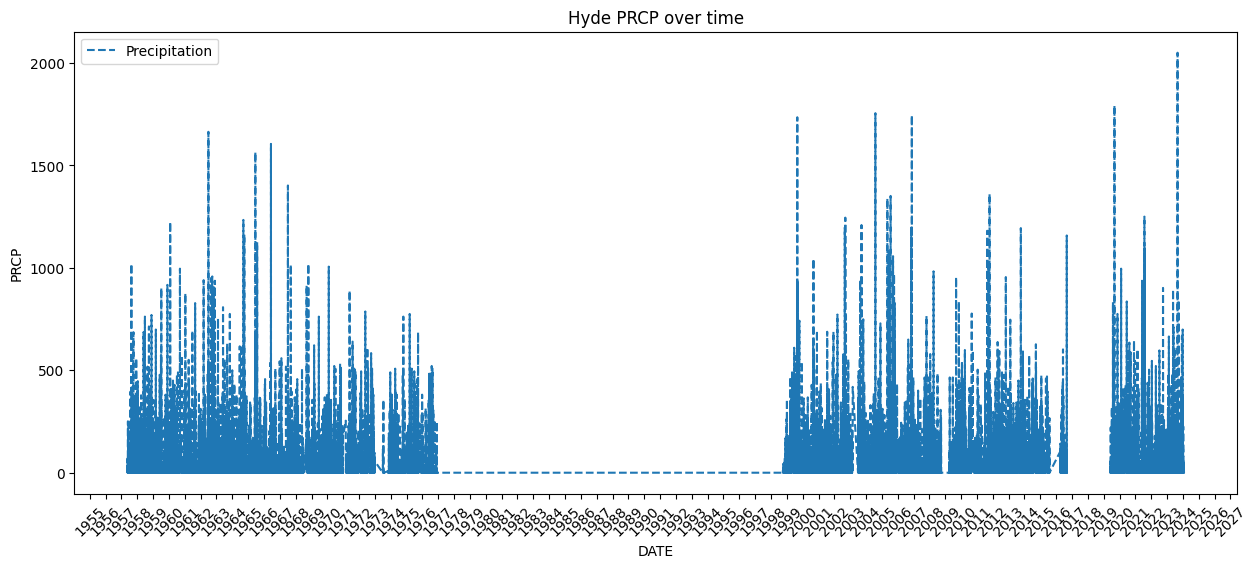

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Study data files
manteopath = "Ocracoke.csv"
mt = pd.read_csv(manteopath)

# Specify the columns for the x and y axes
x_column = 'DATE'
y_column = 'PRCP'

mt[x_column] = pd.to_datetime(mt[x_column])

# Set the size of the figure
plt.figure(figsize=(15, 6))

# Plot the line graph with a dashed line style
plt.plot(mt[x_column], mt[y_column], linestyle='--', label='Precipitation')

# Add labels and title
plt.xlabel('DATE')
plt.ylabel('PRCP')
plt.title('Hyde PRCP over time'.format(y_column, x_column))

# Set x-axis ticks to display every year
plt.gca().xaxis.set_major_locator(YearLocator())

plt.xticks(rotation=45)

plt.legend()

# Display the plot
plt.show()

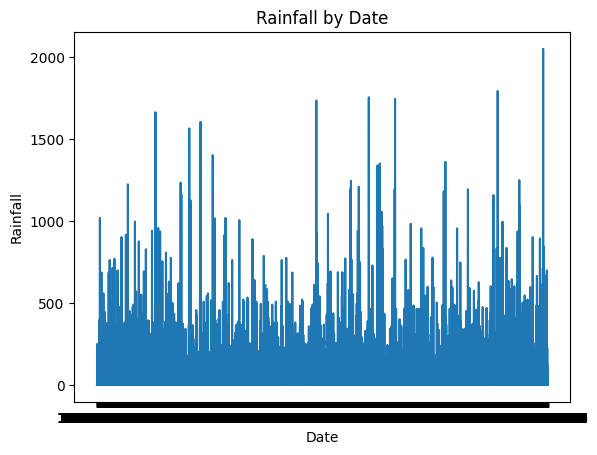

In [21]:
ocracokepath = "Ocracoke.csv"

ocracoke_csv = pd.read_csv(ocracokepath)

# Specify the columns for the x and y axes
x_column = 'DATE'
y_column = 'PRCP'

# Plot the line graph
plt.plot(ocracoke_csv[x_column], ocracoke_csv[y_column])
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.title('Rainfall by Date')
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Study data files
migpath = "migration.csv"
census_df = pd.read_csv(migpath)
reduced_census = census_df[["Area Name", "Year", "Net Migration"]]
reduced_census

,Area Name,Year,Net Migration
0,Alamance County,2017,-9.0
1,Alamance County,2017,-15.0
2,Alamance County,2017,2.0
3,Alamance County,2017,-3.0
4,Alamance County,2017,15.0
...,...,...,...
193440,Yancey County,2020,15.0
193441,Yancey County,2020,11.0
193442,Yancey County,2020,15.0
193443,Yancey County,2020,130.0


In [15]:
cleaned_df = reduced_census.loc[(census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Carteret County') | 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Dare County')| 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Hyde County')]



cleaned_df

,Area Name,Year,Net Migration
295,Carteret County,2017,-25.0
296,Carteret County,2017,-26.0
297,Carteret County,2017,11.0
298,Carteret County,2017,8.0
299,Carteret County,2017,1.0
...,...,...,...
191892,Dare County,2020,-145.0
191893,Dare County,2020,5.0
192327,Hyde County,2020,14.0
192328,Hyde County,2020,4.0


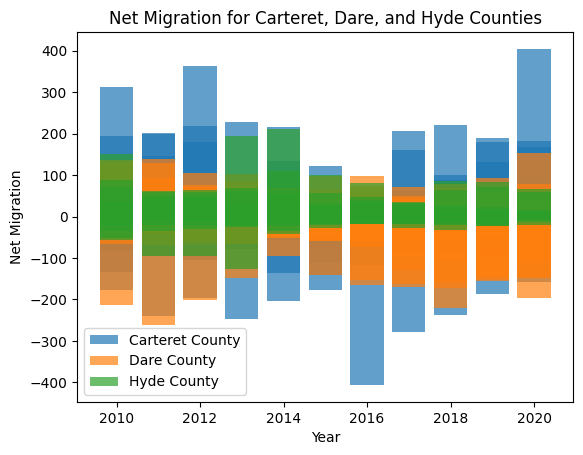

In [17]:
import matplotlib.pyplot as plt


x_column = 'Year'
y_column = 'Net Migration'


grouped_df = cleaned_df.groupby('Area Name')

# Plotting the bar graph for each county with different bar colors
for name, group in grouped_df:
    plt.bar(group[x_column], group[y_column], label=name, alpha=0.7)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.title('Net Migration for Carteret, Dare, and Hyde Counties')
plt.legend()  # Display legend with county names

# Display the plot
plt.show()

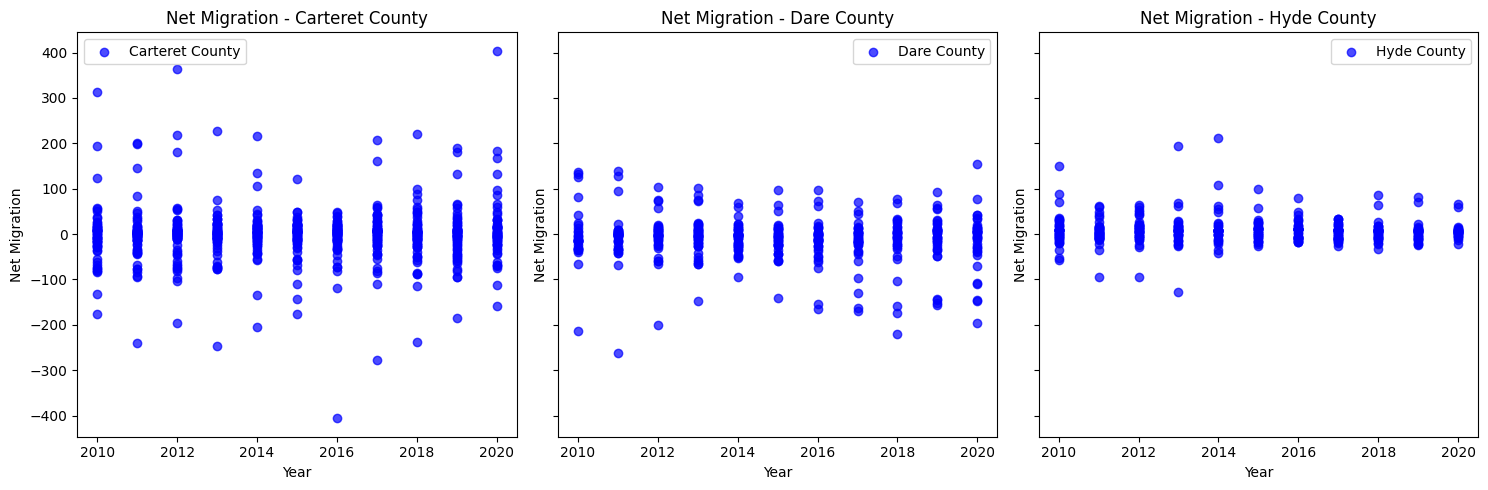

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Study data files
migpath = "migration.csv"
census_df = pd.read_csv(migpath)
reduced_census = census_df[["Area Name", "Year", "Net Migration"]]
x_column = 'Year'
y_column = 'Net Migration'
cleaned_df = reduced_census.loc[(census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Carteret County') | 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Dare County')| 
                                (census_df['External Area']=='North Carolina') &
                                (census_df['Area Name']=='Hyde County')]

grouped_df = cleaned_df.groupby('Area Name')

# Create subplots for each county
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# Plotting scatterplot for each county
for i, (name, group) in enumerate(grouped_df):
    axs[i].scatter(group[x_column], group[y_column], label=name, alpha=0.7, color='b')

    # Adding labels and title for each subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Net Migration')
    axs[i].set_title(f'Net Migration - {name}')
    axs[i].legend()

# Adjust layout to prevent clipping of ylabel
plt.tight_layout()

# Display the plots
plt.show()